In [167]:
from bs4 import BeautifulSoup
import requests
import re
import datetime
import csv
import pandas as pd
from matplotlib import pyplot as plt

In [240]:
start = datetime.datetime.now()

URL = input()

entries = []

USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.164 Safari/537.36 OPR/77.0.4054.277"

https://eksisozluk.com/konusanlarin-turk-ahlakini-zehirlemesi--7494328?p=1


In [241]:
r = requests.get(URL, headers={'User-Agent': USER_AGENT})
soup = BeautifulSoup(r.content, 'html.parser')

In [242]:
def page_counts(url):
    """
        Get page counts of the titles
    """
    r = requests.get(url, headers={'User-Agent':USER_AGENT})
    soup = BeautifulSoup(r.content, 'html.parser')
    try:
        last_page = soup.find('div', {'class':'pager'})['data-pagecount']
    except TypeError:
        last_page = 1
    return int(last_page)

In [243]:
page_count = page_counts(URL)

In [244]:
page_count

44

In [245]:
rootURL = URL[:-1]
for i in range(int(page_count) + 1):   ##pagecount
    
    URL_ = rootURL + str(i)
    r = requests.get(URL_, headers={'User-Agent': USER_AGENT})
    soup2 = BeautifulSoup(r.text, 'html.parser')
    entry = soup2.find('div', {'class':'content'}) # find entry content
    entry_date = soup2.find('a', {'class':'entry-date permalink'}) # find date of the entry
    while entry is not None: # iterate until entry object not None 
        data = {
            'Entry': entry.get_text(separator=" ").replace('\n','').replace('\r', '').replace('\t', '').replace('    ', '').replace('bkz: ', '').replace('---  spoiler  ---', ''),# clear the contents of the entry from unnecessary things
            'Date': entry_date.text[:10],
        }
        entries.append(data)
        entry = entry.find_next('div', {'class':'content'}) # find next entry content
        entry_date = entry_date.find_next('a', {'class':'entry-date permalink'}) # find next date of the entry

In [246]:
end = datetime.datetime.now()

In [247]:
end-start

datetime.timedelta(seconds=26, microseconds=860442)

In [248]:
entries

[{'Entry': 'türk ahlakını bozacak eylemlerin övüldüğü ve gençliğe kötü tesir eden bir program. rtük\'ün müdahelesi şart. edit: çoğu yazar artık sadece k.hidratla beslendiği için argümanları "ama bak bunlar da neler yapıyor\' kafasında. mantıklı argüman kurun tartışalım. müge anlı\'da yaşananlar, dini kullanan çocuk istismarcılarının hepsinin karşısındayım. burada ki olay bu programda ahlaksızlığın başarılı bir durummuş gibi övülmesi ve sürekli bel altı konuşmalar. edit 2: paralı olması tüm sorunu ortadan kaldırıyormuş :) ah be zekası düşükler sizi. acıdım size. daha çok kişiye ulaşmak için youtube\'da kısa kesit, youtube akış ve instagram reelste bolca denk gelebilirsiniz. edit 3: makul seviyede tartışma seviyesinde olan arkadaşlarla gayet ortak hassasiyet çercevesinde bu konuyu konuşabiliyorken küfür eden ezikleri de lanetli yapmak gibi güzel bir huyum var.  ',
  'Date': '09.12.2022'},
 {'Entry': "tabi lan manyak mısın, konuşanlar'da her bölüm 6 yaşındaki çocuklara gelinlik giydirip t

In [249]:
entriesdf = pd.DataFrame.from_dict(entries)

In [250]:
entriesdf

,Entry,Date
0,türk ahlakını bozacak eylemlerin övüldüğü ve g...,09.12.2022
1,"tabi lan manyak mısın, konuşanlar'da her bölüm...",09.12.2022
2,"seyirci diyor ki ""sevgilimi/eşimi aldattım"" ya...",09.12.2022
3,izlediğim sevdiğim bir şey değil de ne ahlakmı...,09.12.2022
4,neden acaba? programda altı yaşında evliliğin ...,09.12.2022
...,...,...
431,o programda küfürlü şeylere gülen insanlar var...,10.12.2022
432,"konuşanlar eşek arısı kadar zehirli ise, türk ...",10.12.2022
433,"bu programın olayı en iğrenç, en rezil, en sah...",10.12.2022
434,( kafa siken dinci zırvaları ) trakya'dan ucun...,10.12.2022


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entry   2343 non-null   object
 1   Date    2343 non-null   object
dtypes: object(2)
memory usage: 36.7+ KB


In [251]:
entriesdf['Date']

0      09.12.2022
1      09.12.2022
2      09.12.2022
3      09.12.2022
4      09.12.2022
          ...    
431    10.12.2022
432    10.12.2022
433    10.12.2022
434    10.12.2022
435    10.12.2022
Name: Date, Length: 436, dtype: object

In [252]:
entriesdf['Date'].value_counts()

09.12.2022    380
10.12.2022     56
Name: Date, dtype: int64

In [183]:
def plotBar(degisken, n=5):
    """
        Girdi: Değişken/sütun ismi
        n = Gösterilecek en çok rastlanan eşsiz değer sayisi
        Çıktı: Çubuk grafiği
    """
    veri_ = data[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color = "blue")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation =45) 
    plt.ylabel("Frekans")
    plt.title(f"Veri sıklığı - {degisken}")
    plt.show()
    print(f"{degisken}:\n{veri_sayma}")

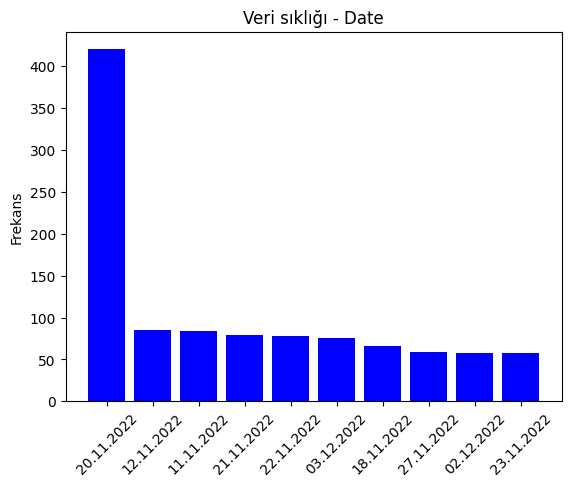

Date:
20.11.2022    420
12.11.2022     85
11.11.2022     84
21.11.2022     79
22.11.2022     78
03.12.2022     75
18.11.2022     66
27.11.2022     59
02.12.2022     58
23.11.2022     58
Name: Date, dtype: int64


In [184]:
plotBar('Date', 10)

In [253]:
date_data = entriesdf.groupby(["Date"], as_index = False).count().sort_values(by=['Entry'],ascending=False)

In [254]:
date_data.Date = pd.to_datetime(date_data.Date)

In [255]:
date_data.Date

0   2022-09-12
1   2022-10-12
Name: Date, dtype: datetime64[ns]

In [256]:
date_data.set_index('Date', inplace=True)

In [257]:
date_data

,Entry
Date,
2022-09-12,380
2022-10-12,56


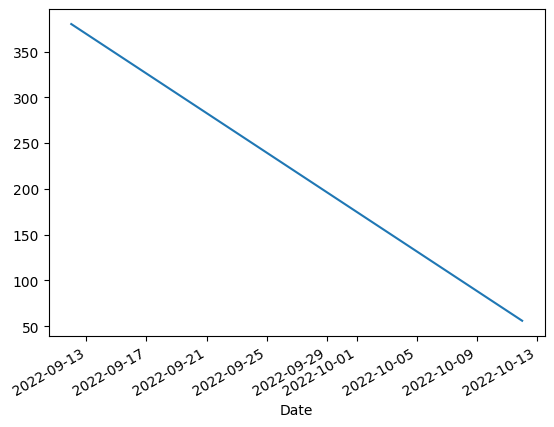

In [258]:
ax = date_data['Entry'].plot()

ticklabels = date_data.index.strftime('%Y-%m-%d')

plt.show()

In [191]:
dataset = pd.read_csv("sentiment_data.csv")


In [192]:
df = dataset.copy()
df.head()


,Unnamed: 0,Rating,Review
0,0,1.0,3 yıldır tık demedi. :)
1,1,1.0,3 yıldır kullanıyorum müthiş
2,2,1.0,Ürün bugün elime geçti çok fazla inceleme fırs...
3,3,1.0,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,4,1.0,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [193]:
df = df.drop(['Unnamed: 0'], axis=1)

In [194]:
df = df.dropna()

In [195]:
df

,Rating,Review
0,1.0,3 yıldır tık demedi. :)
1,1.0,3 yıldır kullanıyorum müthiş
2,1.0,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1.0,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1.0,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
281937,0.0,turkcell'den 2000 yılında new york borsasında ...
281938,0.0,Yeni telefon sapığım Turkcell .Açmadığım halde...
281939,0.0,106 lira fatura mı olur turkcell sadece soruyorum
281940,0.0,@Buragl111 turkcell kazık takıl sen bimcell le...


In [198]:
df['Rating'] = df['Rating'].astype('int64')

In [199]:
df

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
281937,0,turkcell'den 2000 yılında new york borsasında ...
281938,0,Yeni telefon sapığım Turkcell .Açmadığım halde...
281939,0,106 lira fatura mı olur turkcell sadece soruyorum
281940,0,@Buragl111 turkcell kazık takıl sen bimcell le...


In [200]:
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,  Dropout
from keras.preprocessing.text import Tokenizer
##from keras.preprocessing.sequence import pad_sequences

In [201]:
df['Rating'].unique().tolist()


[1, 0]

In [202]:
target = df['Rating'].values.tolist()#negatif=0, pozitif=1
data = df['Review'].values.tolist()#text verisi


In [203]:
data

['3 yıldır tık demedi. :)',
 '3 yıldır kullanıyorum müthiş ',
 'Ürün bugün elime geçti çok fazla inceleme fırsatım olmadı ancak gözüme çarpan ilk şey usb bağlantısı için pil kapağının altında çok güzel yer yapmış olmaları, daha önceden o aparatı kaybetmiş biri olarak bu özelliğini çok sevdim. Ayrıca 1000dpi olması çok iyi bu tip farelerin çoğu 800dpi oluyor. Eğer sizde benim gibi masaüstü bilgisayarınızdan oyuncu faresi ile yüksek dpi ayarına alışmış biriyseniz windows ayarından fareyi en hızlıya getirin ve bu fareyi sipariş verin pişman olmazsınız. Teşekkürler Logitech',
 'Almaya karar verdim. Hemencecik geldi. Keyifle kullanıyorum',
 'Günlük kullanımınızı çok çok iyi karsılıyor kısaca mükemmel',
 'gayet güzel',
 'Çok kaliteli bir ürün ve fiyatı da uygun. Uzun araştırmalarım sonucu aldım ve çok memnunum.',
 'yaklaşık 5 senedir kullanıyorum. defalarca düşmesine rağmen banamısın demedi. 5 yıl daha gider diye düşünüyorum.',
 'Ürün günlük kullanım için çok uygun. Ürünle birlikte 1 adet pi

In [204]:
y_test.unique().tolist()

AttributeError: 'list' object has no attribute 'unique'

In [205]:
seperation = int(len(data) * 0.80)
x_train, x_test = data[:seperation], data[seperation:]
y_train, y_test = target[:seperation], target[seperation:]

In [206]:
df.shape

(281459, 2)

In [207]:
num_words = 10000

In [208]:
tokenizer = Tokenizer(num_words=num_words)


In [209]:
type(data[1])

str

In [210]:
data

['3 yıldır tık demedi. :)',
 '3 yıldır kullanıyorum müthiş ',
 'Ürün bugün elime geçti çok fazla inceleme fırsatım olmadı ancak gözüme çarpan ilk şey usb bağlantısı için pil kapağının altında çok güzel yer yapmış olmaları, daha önceden o aparatı kaybetmiş biri olarak bu özelliğini çok sevdim. Ayrıca 1000dpi olması çok iyi bu tip farelerin çoğu 800dpi oluyor. Eğer sizde benim gibi masaüstü bilgisayarınızdan oyuncu faresi ile yüksek dpi ayarına alışmış biriyseniz windows ayarından fareyi en hızlıya getirin ve bu fareyi sipariş verin pişman olmazsınız. Teşekkürler Logitech',
 'Almaya karar verdim. Hemencecik geldi. Keyifle kullanıyorum',
 'Günlük kullanımınızı çok çok iyi karsılıyor kısaca mükemmel',
 'gayet güzel',
 'Çok kaliteli bir ürün ve fiyatı da uygun. Uzun araştırmalarım sonucu aldım ve çok memnunum.',
 'yaklaşık 5 senedir kullanıyorum. defalarca düşmesine rağmen banamısın demedi. 5 yıl daha gider diye düşünüyorum.',
 'Ürün günlük kullanım için çok uygun. Ürünle birlikte 1 adet pi

In [211]:
tokenizer.fit_on_texts(data)

In [212]:
import pickle

with open('turkish_tokenizer_hack.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [213]:
with open('turkish_tokenizer_hack.pickle', 'rb') as handle:
    turkish_tokenizer = pickle.load(handle)

In [214]:
x_train_tokens = turkish_tokenizer.texts_to_sequences(x_train)

In [215]:
x_train[100]


'Bu fiyata bu kalite kaçırmayın derim '

In [216]:

x_train_tokens[100]

[5, 44, 5, 143, 349, 148]

In [217]:
x_test_tokens = turkish_tokenizer.texts_to_sequences(x_test)

In [218]:
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)
num_tokens.shape

(281459,)

In [219]:
max_tokens = np.mean(num_tokens) + 2*np.std(num_tokens) 
max_tokens = int(max_tokens)
max_tokens

62

In [220]:
import tensorflow as tf

In [221]:
tf.keras.utils.pad_sequences

<function keras.utils.data_utils.pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)>

In [222]:
x_train_pad = tf.keras.utils.pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = tf.keras.utils.pad_sequences(x_test_tokens, maxlen=max_tokens)

In [223]:
print(x_train_pad.shape)
print(x_test_pad.shape)

(225167, 62)
(56292, 62)


In [224]:
model = Sequential()

In [225]:
embedding_size = 50 

In [226]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))


In [227]:
model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=8, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=4, return_sequences=False))
model.add(Dropout(0.2))
# Dense layer: Tek nörondan oluşuyor
model.add(Dense(1, activation='sigmoid'))

In [228]:
from keras.optimizers import Adam
optimizer = Adam(lr=1e-3)

C:\Users\utku.dogan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [229]:
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])


In [230]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 62, 50)           500000    
                                                                 
 lstm_3 (LSTM)               (None, 62, 16)            4288      
                                                                 
 dropout_3 (Dropout)         (None, 62, 16)            0         
                                                                 
 lstm_4 (LSTM)               (None, 62, 8)             800       
                                                                 
 dropout_4 (Dropout)         (None, 62, 8)             0         
                                                                 
 lstm_5 (LSTM)               (None, 4)                 208       
                                                                 
 dropout_5 (Dropout)         (None, 4)                

In [231]:
type(y_train)
x = np.array(y_train)
print(np.unique(x))

[0 1]


In [233]:
x_train_pad = np.array(x_train_pad)
y_train = np.array(y_train)

In [234]:
model.fit(x_train_pad, y_train, epochs=10, batch_size=256)

Epoch 1/10
880/880 [==============================] - 111s 114ms/step - loss: 0.2032 - accuracy: 0.9489
Epoch 2/10
880/880 [==============================] - 101s 115ms/step - loss: 0.1074 - accuracy: 0.9662
Epoch 3/10
880/880 [==============================] - 97s 110ms/step - loss: 0.0824 - accuracy: 0.9747
Epoch 4/10
880/880 [==============================] - 104s 118ms/step - loss: 0.0660 - accuracy: 0.9803
Epoch 5/10
880/880 [==============================] - 106s 120ms/step - loss: 0.0545 - accuracy: 0.9844
Epoch 6/10
880/880 [==============================] - 107s 122ms/step - loss: 0.0442 - accuracy: 0.9882
Epoch 7/10
880/880 [==============================] - 108s 123ms/step - loss: 0.0369 - accuracy: 0.9904
Epoch 8/10
880/880 [==============================] - 102s 116ms/step - loss: 0.0323 - accuracy: 0.9921
Epoch 9/10
880/880 [==============================] - 100s 114ms/step - loss: 0.0284 - accuracy: 0.9932
Epoch 10/10
880/880 [==============================] - 101s 114ms

In [236]:
x_test_pad = np.array(x_test_pad)
y_test = np.array(y_test)
result = model.evaluate(x_test_pad, y_test)
result

1760/1760 [==============================] - 45s 25ms/step - loss: 1.0838 - accuracy: 0.7867


[1.0837681293487549, 0.7866659760475159]

In [237]:
def predict(texts):
    tokens = turkish_tokenizer.texts_to_sequences(texts)
    tokens_pad = tf.keras.utils.pad_sequences(tokens, maxlen=max_tokens)
    return model.predict(tokens_pad)

In [261]:
texts = entriesdf['Entry'].values.tolist()
texts

['türk ahlakını bozacak eylemlerin övüldüğü ve gençliğe kötü tesir eden bir program. rtük\'ün müdahelesi şart. edit: çoğu yazar artık sadece k.hidratla beslendiği için argümanları "ama bak bunlar da neler yapıyor\' kafasında. mantıklı argüman kurun tartışalım. müge anlı\'da yaşananlar, dini kullanan çocuk istismarcılarının hepsinin karşısındayım. burada ki olay bu programda ahlaksızlığın başarılı bir durummuş gibi övülmesi ve sürekli bel altı konuşmalar. edit 2: paralı olması tüm sorunu ortadan kaldırıyormuş :) ah be zekası düşükler sizi. acıdım size. daha çok kişiye ulaşmak için youtube\'da kısa kesit, youtube akış ve instagram reelste bolca denk gelebilirsiniz. edit 3: makul seviyede tartışma seviyesinde olan arkadaşlarla gayet ortak hassasiyet çercevesinde bu konuyu konuşabiliyorken küfür eden ezikleri de lanetli yapmak gibi güzel bir huyum var.  ',
 "tabi lan manyak mısın, konuşanlar'da her bölüm 6 yaşındaki çocuklara gelinlik giydirip tecavüz ediyorlar zaten. yayından kaldırılsın.

In [262]:
predict(texts[2:5])

1/1 [==============================] - 2s 2s/step
[[0.00142103]
 [0.9532876 ]
 [0.9903667 ]]


In [263]:
texts[2:5]

['seyirci diyor ki "sevgilimi/eşimi aldattım" ya da "sevgilisi olanları/evlileri ayırmak benim en sevdiğim şey" hasan da bunları normal karşılayıp, bu karaktersizlere gülüp üstüne üstlük hediye veriyor. tabii sadece hasan değil seyircisi de! resmen kötülüğü, terbiyesizliği yüceltiyorlar. kahkaha attıkları şeyler benim midemi bulandırıyor. allah akıl, fikir, vicdan, mide versin inşallah. yazık çünkü! ( #130215295 )  ',
 'izlediğim sevdiğim bir şey değil de ne ahlakmış arkadaş her şeyden etkileniyor zehirleniyor dedirten durum.  ',
 'neden acaba? programda altı yaşında evliliğin normalleştiriyor mu?  tarikatler ve cemaatler kadar zarar vermiyordur bu ülkeye.  ']

In [264]:
from keras.models import load_model

model.save('hack_model.h5')

In [278]:
a = texts[40:42]
a

['konuşanları severek izliyorum, ahlakımı dizilere göre şekillendirmediğim için zehirlenmiyorum. fakat başlığın altı her zamanki klasik entrylerle dolmuş. düşük iq lu yazarların vazgeçemediği trend; kötüyü daha kötüsünü öne sürerek iyileştirme çabası.  ',
 ' konuşanlar  programından önce türk ahlakı süper olduğu için doğru olan önermedir. 6 yaşındaki kızla evlenmeyi ve sabah programlarındaki rezillikleri hep bu program öğretmiştir.  ']

In [280]:
predicts = predict(texts)

14/14 [==============================] - 0s 22ms/step
[[0.99928015]
 [0.9998127 ]
 [0.00142104]
 [0.9532876 ]
 [0.9903667 ]
 [0.9992396 ]
 [0.9987604 ]
 [0.99981266]
 [0.99972826]
 [0.90763533]
 [0.08493465]
 [0.9298892 ]
 [0.90361357]
 [0.99948174]
 [0.98768693]
 [0.9992423 ]
 [0.991948  ]
 [0.997127  ]
 [0.01249286]
 [0.9996507 ]
 [0.6500703 ]
 [0.8368107 ]
 [0.02467104]
 [0.9994808 ]
 [0.05709485]
 [0.9986445 ]
 [0.9991102 ]
 [0.0111505 ]
 [0.9904538 ]
 [0.03237848]
 [0.50930756]
 [0.9996794 ]
 [0.19602352]
 [0.99977285]
 [0.02075471]
 [0.99976   ]
 [0.01859236]
 [0.9700743 ]
 [0.999767  ]
 [0.99955034]
 [0.99659455]
 [0.99845046]
 [0.99981755]
 [0.49407187]
 [0.9853539 ]
 [0.98265994]
 [0.9994021 ]
 [0.9998034 ]
 [0.05537158]
 [0.52313614]
 [0.0136483 ]
 [0.00150067]
 [0.00159756]
 [0.9988512 ]
 [0.99796635]
 [0.99783397]
 [0.03494073]
 [0.9994981 ]
 [0.99940366]
 [0.9995516 ]
 [0.02749431]
 [0.902931  ]
 [0.99959135]
 [0.00158408]
 [0.9996689 ]
 [0.99961627]
 [0.46832433]
 [0.7203

In [270]:
type(predicts)

NoneType

In [289]:
tahmin = list()

In [288]:
for i in model.predict(tokens_pad):
    if i <0.5:
        tahmin.append("negatif")
        print("negatif")
    else:
        tahmin.append("pozitif")
        print("pozitif")
        

14/14 [==============================] - 0s 19ms/step
[[0.99928015]
 [0.9998127 ]
 [0.00142104]
 [0.9532876 ]
 [0.9903667 ]
 [0.9992396 ]
 [0.9987604 ]
 [0.99981266]
 [0.99972826]
 [0.90763533]
 [0.08493465]
 [0.9298892 ]
 [0.90361357]
 [0.99948174]
 [0.98768693]
 [0.9992423 ]
 [0.991948  ]
 [0.997127  ]
 [0.01249286]
 [0.9996507 ]
 [0.6500703 ]
 [0.8368107 ]
 [0.02467104]
 [0.9994808 ]
 [0.05709485]
 [0.9986445 ]
 [0.9991102 ]
 [0.0111505 ]
 [0.9904538 ]
 [0.03237848]
 [0.50930756]
 [0.9996794 ]
 [0.19602352]
 [0.99977285]
 [0.02075471]
 [0.99976   ]
 [0.01859236]
 [0.9700743 ]
 [0.999767  ]
 [0.99955034]
 [0.99659455]
 [0.99845046]
 [0.99981755]
 [0.49407187]
 [0.9853539 ]
 [0.98265994]
 [0.9994021 ]
 [0.9998034 ]
 [0.05537158]
 [0.52313614]
 [0.0136483 ]
 [0.00150067]
 [0.00159756]
 [0.9988512 ]
 [0.99796635]
 [0.99783397]
 [0.03494073]
 [0.9994981 ]
 [0.99940366]
 [0.9995516 ]
 [0.02749431]
 [0.902931  ]
 [0.99959135]
 [0.00158408]
 [0.9996689 ]
 [0.99961627]
 [0.46832433]
 [0.7203

TypeError: 'NoneType' object is not iterable

In [299]:
a = predict(['Aşk','vasat','Berbat'])

1/1 [==============================] - 0s 33ms/step
[[0.9911675 ]
 [0.07285452]
 [0.16465288]]
